<b> Lets visualize the penguin dataset using seaborn.</b>

<b>Table of contents:</b>
<ul>
<li><a href="#Loading">Loading the dataset</a></li>  
<li><a href="#Scatter">Scatter plot</a></li>
<li><a href="#Histogram">Histogram</a></li>
<li><a href="#Bar">Bar plot</a></li>
<li><a href="#Box">Box Plot</a></li>
<li><a href="#Violin">Violin plot</a></li>
<li><a href="#Facet">Facet grid</a></li>      
<li><a href="#Pair">Pair plot</a></li>     
<li><a href="#Heatmap">Heatmap</a></li>    
<li><a href="#Conclusion">Conclusion</a></li>   
</ul>


<a id="Loading"></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Loading The Dataset</b></p>

Let's load the dataset with the `read_csv` and look at the first five rows the `head` method.

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("datasets/penguins_size.csv")
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


<a id="Loading"></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Understanding The Dataset</b></p>

### Explore the dataset

In [44]:
data.shape

(344, 7)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Let's take a look at missing data with the `isnull` method.

In [46]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Let's look at the unique values in the categorical columns.

In [47]:
data['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [48]:
data['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

The sex column has a `.` value. Let's find where the `.` value of the sex is.

In [49]:
data[data['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


Let's assign a value to row ID 336 let's say, Female.

In [50]:
data.at[336,'sex'] = 'FEMALE'

Now let's check the values of this row.

In [51]:
data.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

Let's look at the categories of the columns with the pie plot

<AxesSubplot:ylabel='species'>

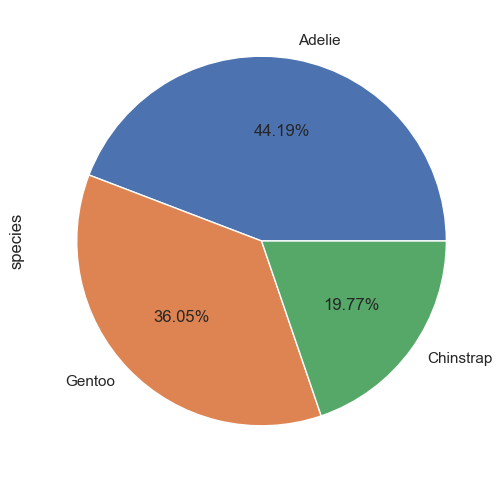

In [52]:
Species=data.species.value_counts()
Species.plot(kind='pie',autopct="%.2f%%")

<AxesSubplot:ylabel='island'>

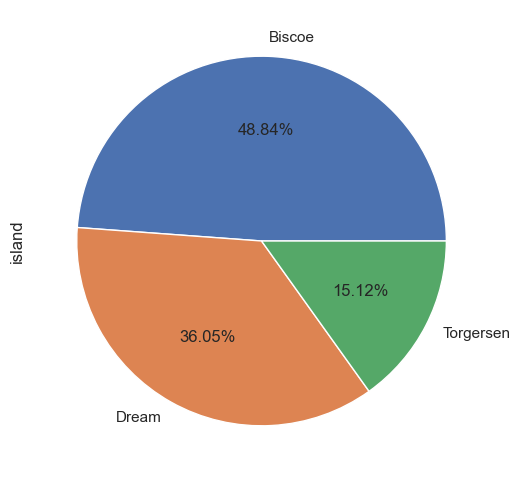

In [53]:
Island=data.island.value_counts()
Island.plot(kind='pie',autopct="%.2f%%")

<AxesSubplot:ylabel='sex'>

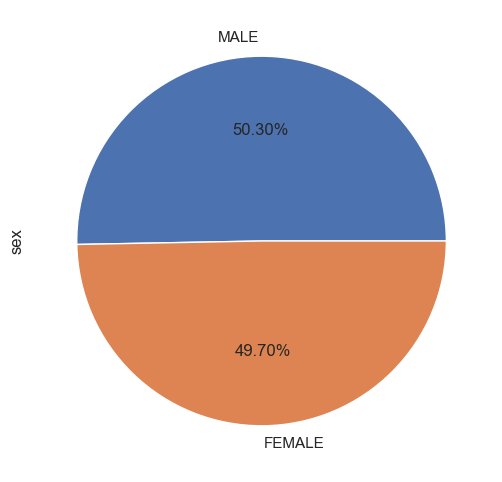

In [54]:
Sex=data.sex.value_counts()
Sex.plot(kind='pie',autopct="%.2f%%")

In [55]:
data.sex.value_counts()

MALE      168
FEMALE    166
Name: sex, dtype: int64

Now let's import the necessary libraries and set the graphic theme with the `set_theme` method.

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme()
sns.set(rc = {"figure.figsize": (8,6), "figure.dpi" : 100})

Let's use the warning package to ignore the warning messages.

In [57]:
import warnings
warnings.filterwarnings("ignore")

<a id="Scatter"></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Scatter Plot</b></p>

In [58]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


The scatter plot is used to display the relationship between variables. Let’s see the scatter plot of culmen lengths and depths by penguin species.

Text(0.5, 1.0, 'Culmenl Length vs Culmen Depth')

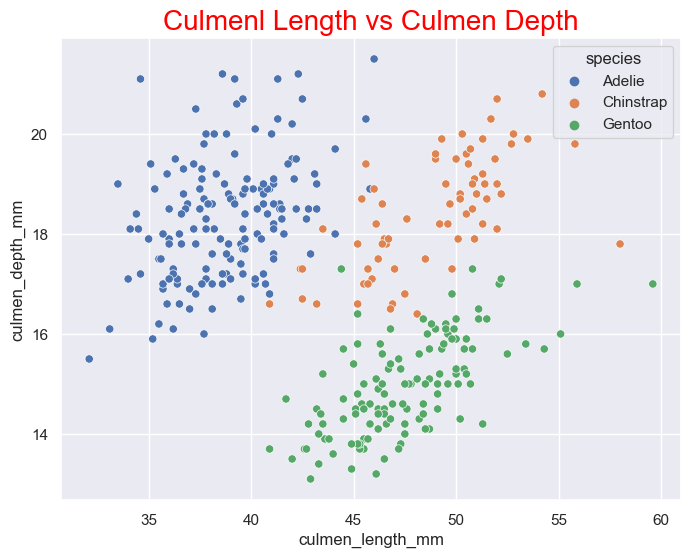

In [59]:
sns.scatterplot(x="culmen_length_mm", y="culmen_depth_mm", data=data, hue="species")
plt.title("Culmenl Length vs Culmen Depth", size=20, color="red")

From the scatter plot, you can see how the species differ from each other.

<a id="Histogram"></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Histogram</b></p>

The histogram plot shows the distribution of the data. You can use the histogram plot to see the distribution of one or more variables. Now let’s see the histogram of the flipper length using the histplot function.

Text(0.5, 1.0, 'Flipper Length')

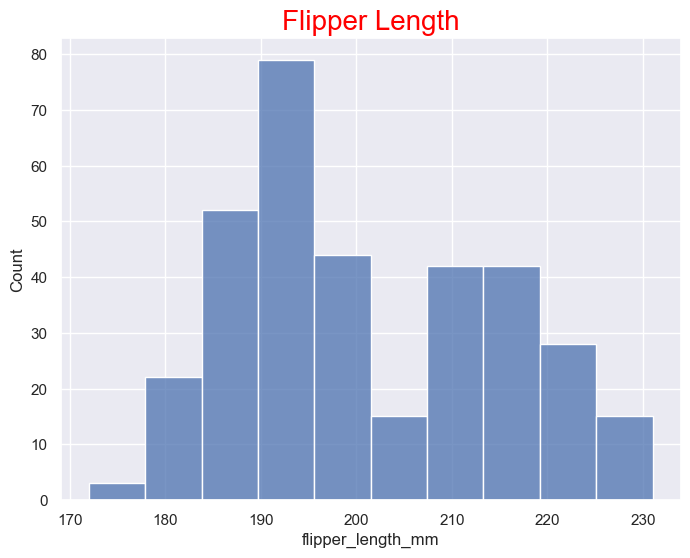

In [60]:
sns.histplot(x ="flipper_length_mm", data=data)
plt.title("Flipper Length", size=20, color="red")

Note that the histogram calculates the number of observations that fall within the intervals. You can also flip the plot with y argument.

You can control the width of the rectangles in the histogram. To do this, you can use the bindwidth parameter.

Text(0.5, 1.0, 'Flipper Length')

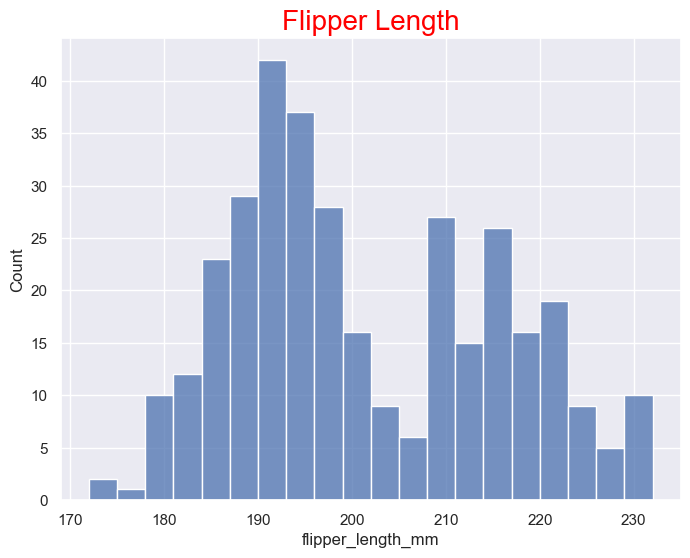

In [61]:
sns.histplot(x = "flipper_length_mm", data = data, binwidth=3)
plt.title("Flipper Length", size=20, color="red")

You can also add the kde, which represents the probability distribution curve, to the histogram plot.

Text(0.5, 1.0, 'Flipper Length')

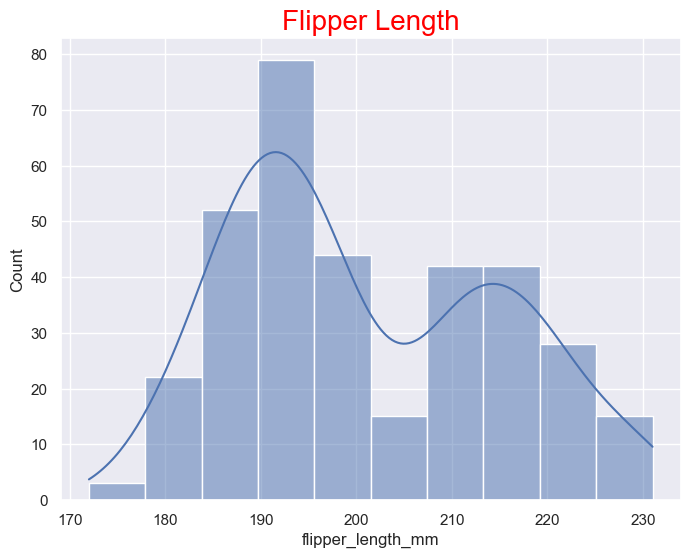

In [62]:
sns.histplot(x = "flipper_length_mm", data = data, kde = True)
plt.title("Flipper Length", size=20, color="red")

You can use the hue parameter to see the histograms of categories.

Text(0.5, 1.0, 'Flipper Length')

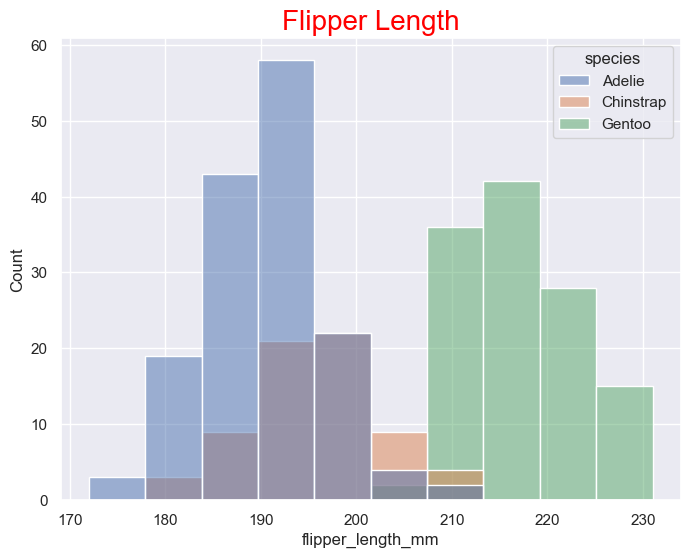

In [63]:
sns.histplot(x = "flipper_length_mm", data = data, hue = "species")
plt.title("Flipper Length", size=20, color="red")

<a id="Bar"></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Bar Plot</b></p>

A bar plot represents an estimate of the central tendency for a numeric variable with the height of each rectangle. Let’s see the bar plot showing the flipper lengths of penguin species.

Text(0.5, 1.0, 'Flipper Length for 3 Penguin Species')

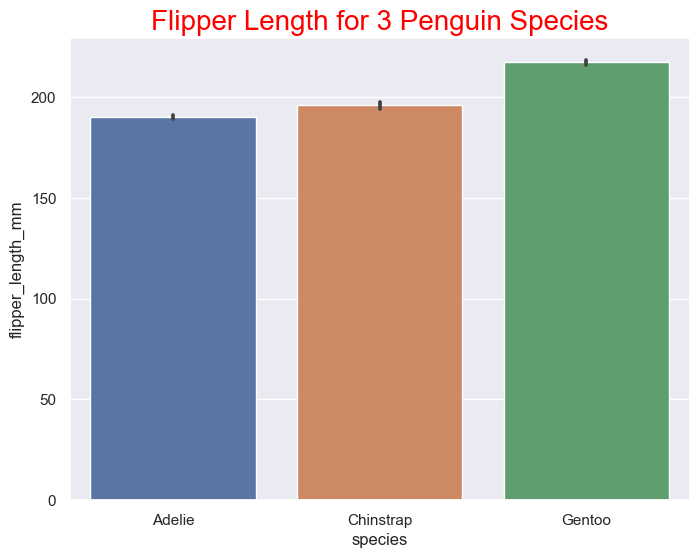

In [64]:
sns.barplot(x ="species", y="flipper_length_mm", data=data)
plt.title("Flipper Length for 3 Penguin Species", size=20, color="red")

By default, the bars are calculated based on the mean of the values. You can use another statistic instead of the mean using the estimator parameter. Let me use the hue parameter to see the flipper lengths of the species by sex.

Text(0.5, 1.0, 'Flipper Length for 3 Penguin Species by Sex')

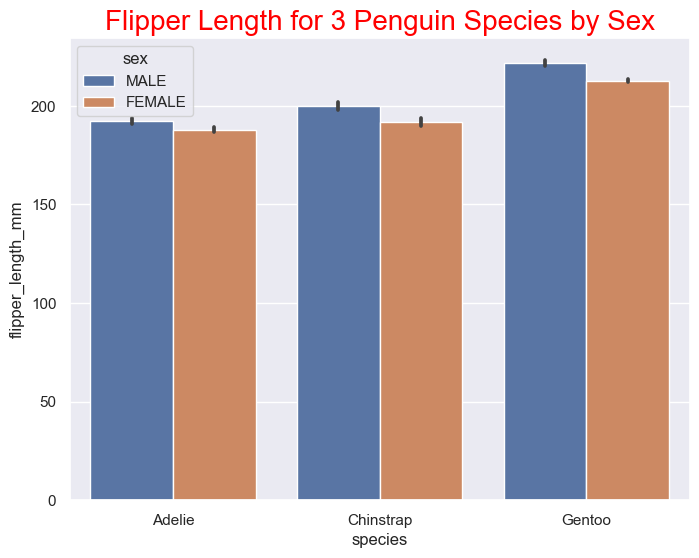

In [65]:
sns.barplot(x = "species", y = "flipper_length_mm", data =data, hue = "sex")
plt.title("Flipper Length for 3 Penguin Species by Sex", size=20, color="red")

<a id="Box"></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Box Plot</b></p>

The box plot is used to compare the distribution of numerical data between levels of a categorical variable. Let’s see the distribution of flipper length by species.

Text(0.5, 1.0, 'Flipper Length for 3 Penguin Species')

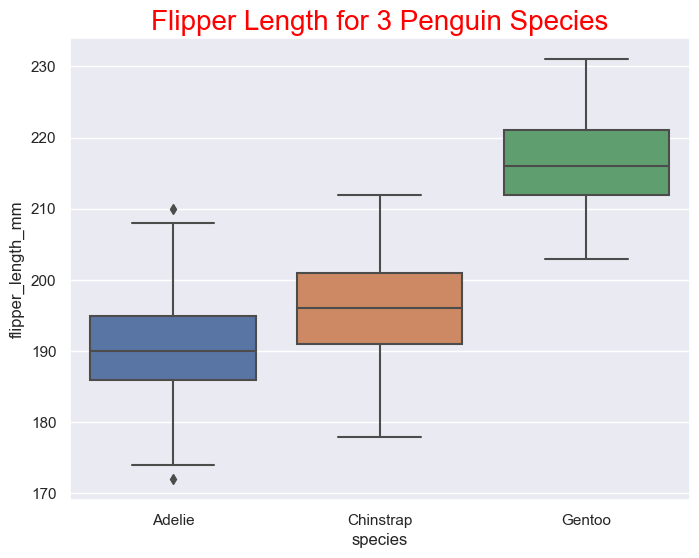

In [66]:
sns.boxplot(x = "species", y = "flipper_length_mm", data =data)
plt.title("Flipper Length for 3 Penguin Species", size=20, color="red")

You can use the hue parameter to see a boxplot of flipper lengths of species by sex.

Text(0.5, 1.0, 'Flipper Length for 3 Penguin Species by Sex')

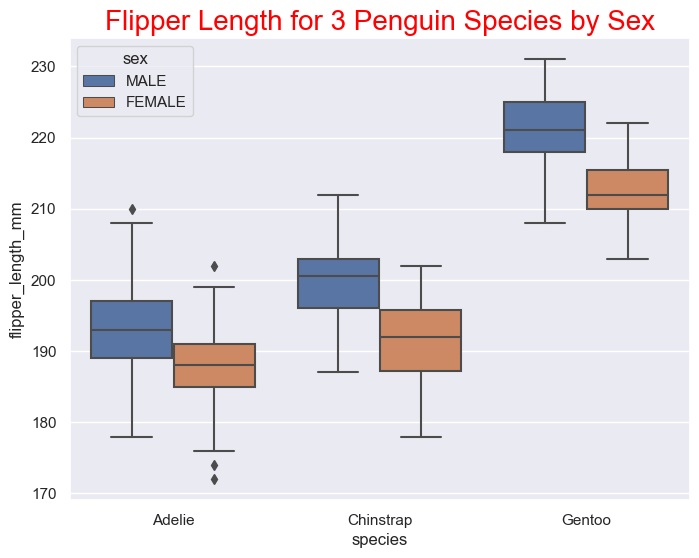

In [67]:
sns.boxplot(x = "species", y = "flipper_length_mm", data =data, hue = "sex")
plt.title("Flipper Length for 3 Penguin Species by Sex", size=20, color="red")

<a id="Violin"></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Violin Plot</b></p>

You can think of the violin plot as a box plot. This plot is used to compare the distribution of numerical values among categorical variables. Let’s see the violin plot of flipper length.

Text(0.5, 1.0, 'Flipper Length for 3 Penguin Species')

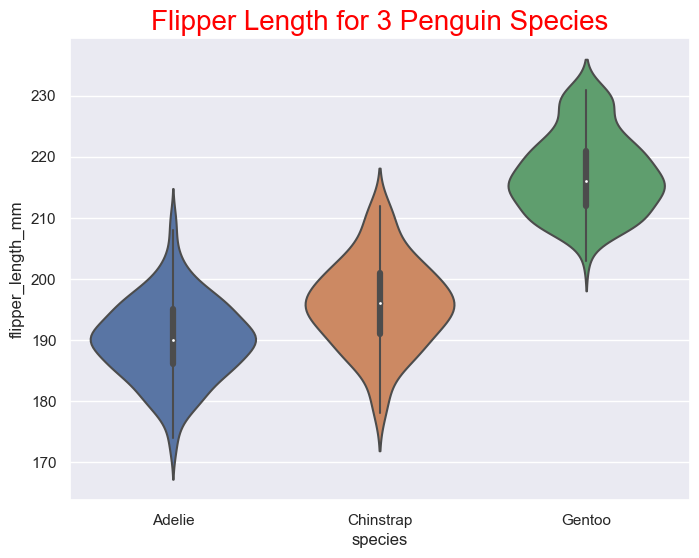

In [68]:
sns.violinplot(x = "species", y = "flipper_length_mm", data = data)
plt.title("Flipper Length for 3 Penguin Species", size=20, color="red")

You can also use the hue parameter to see the violin plot of the flipper lengths by sex.

Text(0.5, 1.0, 'Flipper Length for 3 Penguin Species by Sex')

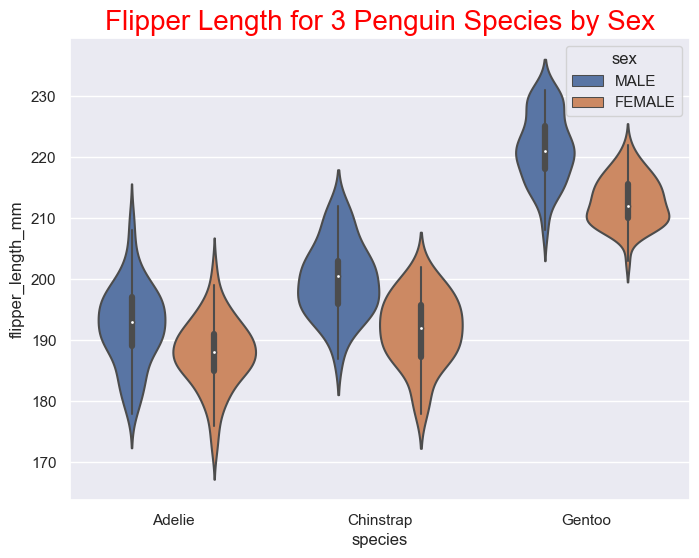

In [69]:
sns.violinplot(x = "species", y = "flipper_length_mm", data = data, hue = "sex")
plt.title("Flipper Length for 3 Penguin Species by Sex", size=20, color="red")

<a id="Facet"></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Facet Plot</b></p>

You can use a facet grid to see a grid graph of the different subsets in your dataset. For example, let me draw the histogram plot of the penguins’ flipper length according to the island and sex variables. Let’s assign column and row variables to add more subplots to the figure. 

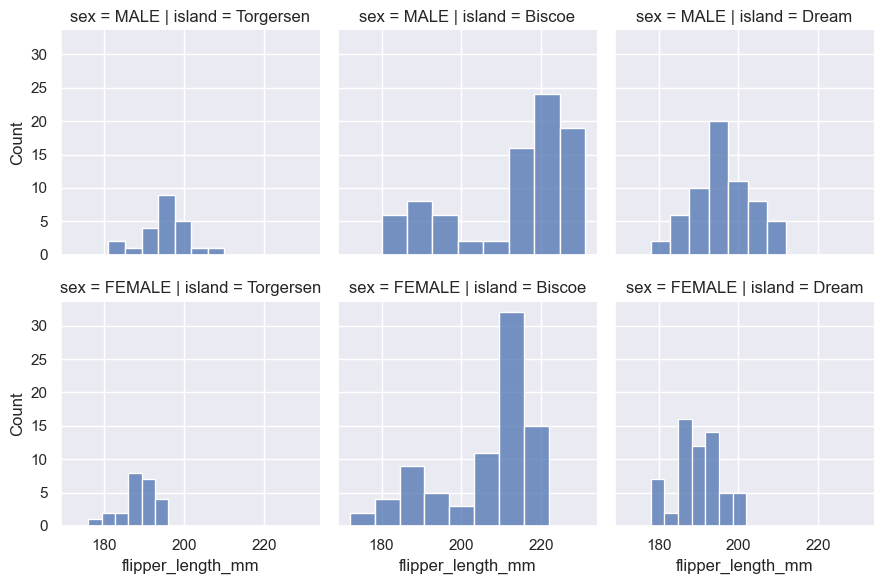

In [70]:
sns.FacetGrid(data, col="island", row="sex").map(sns.histplot, "flipper_length_mm")

You can also draw a different plot on every facet. For example, let’s see the scatter plot of flipper length.

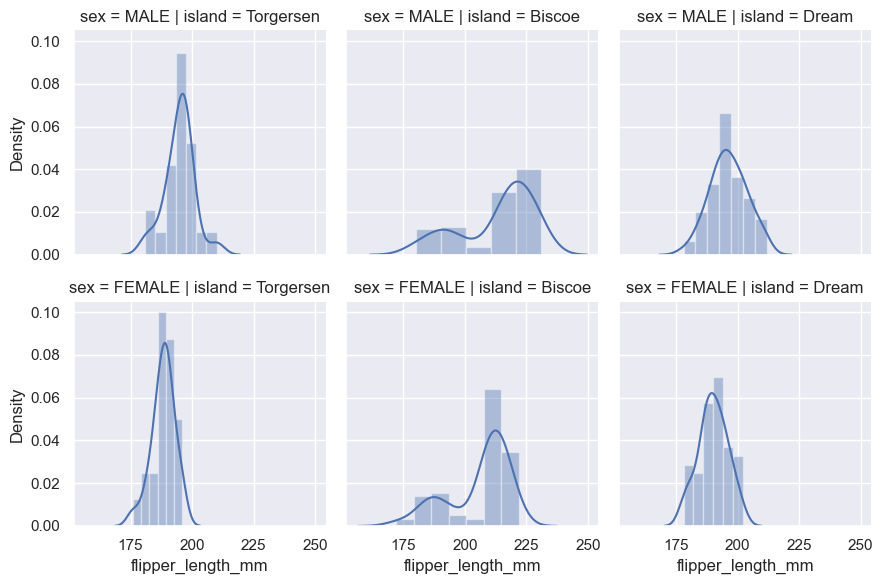

In [71]:
sns.FacetGrid(data, col = "island", row = "sex").map(sns.distplot, "flipper_length_mm")

<a id="Pair"></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Pair Plot</b></p>

You can use the pairplot method to see the pair relations of the variables. This function creates cross-plots of each numeric variable in the dataset. Let’s see the pairs of numerical variables according to penguin species in the dataset.

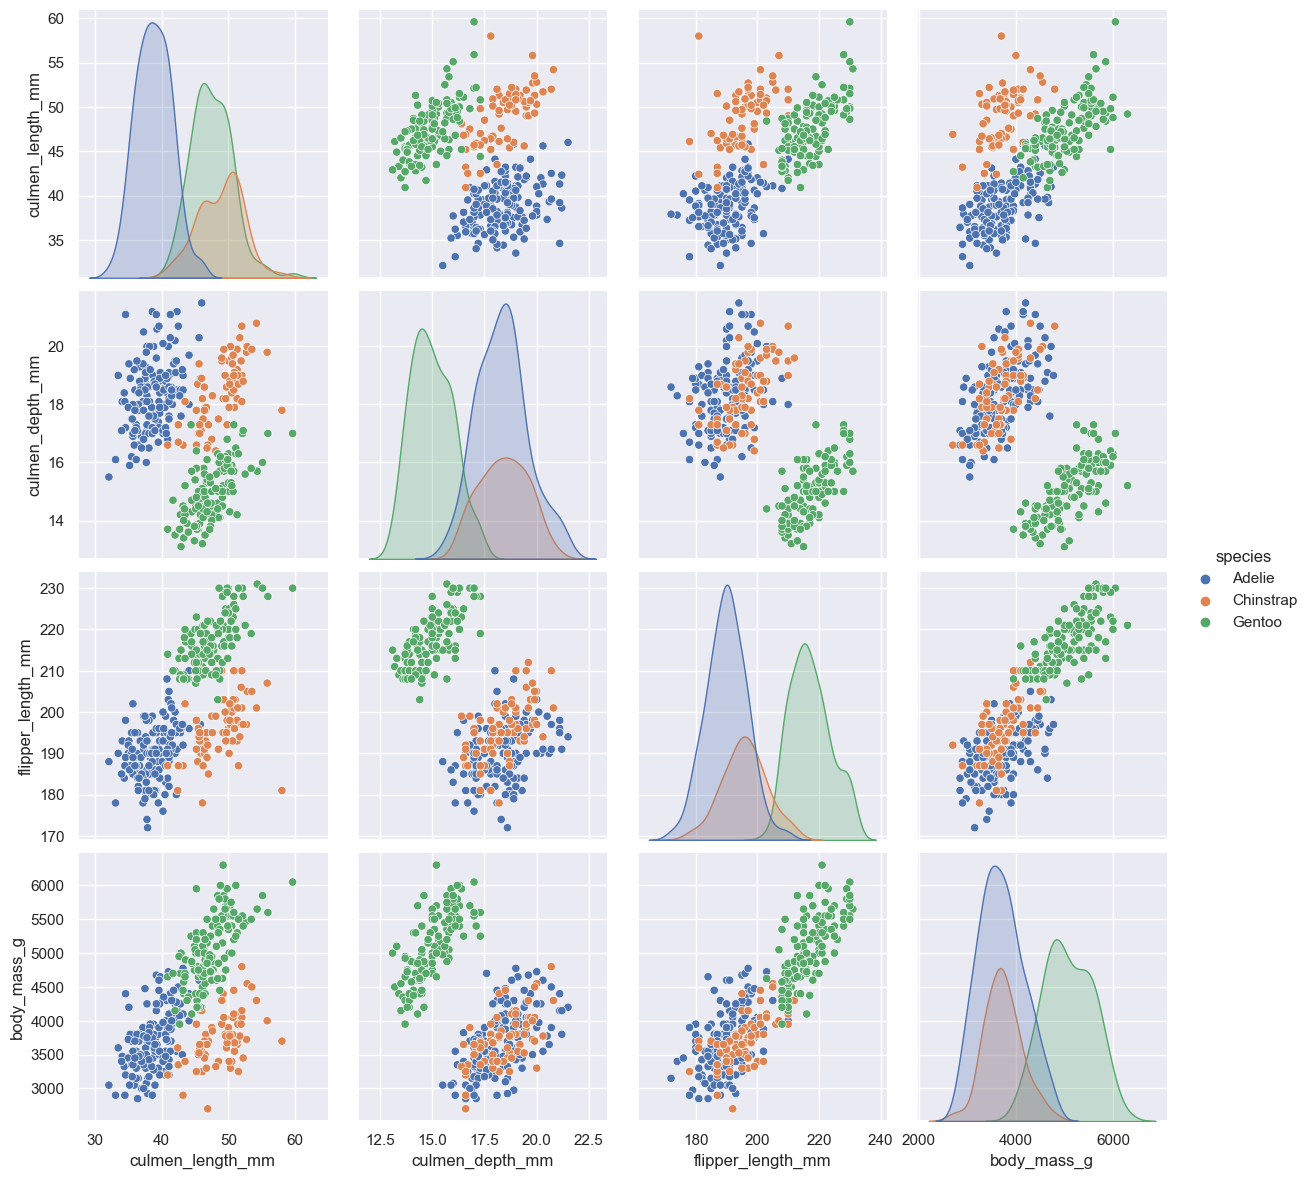

In [72]:
sns.pairplot(data, hue = "species", height=3)

You can use the diag_kind parameter to have histograms on the diagonal axis.

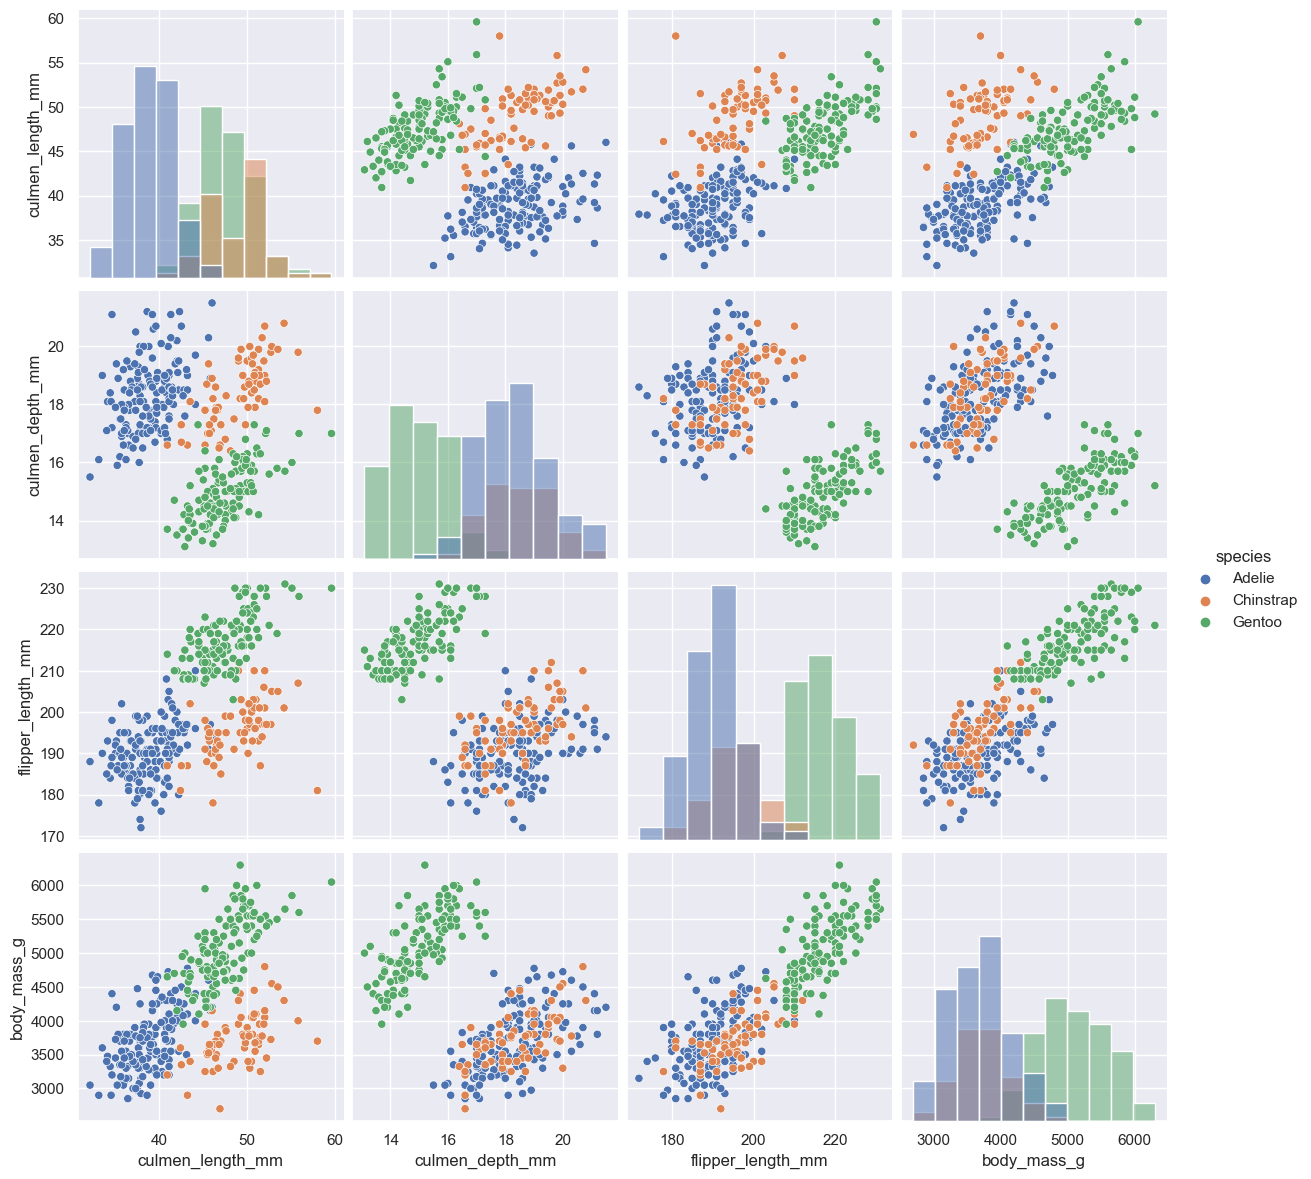

In [73]:
sns.pairplot(data, hue = "species", height=3, diag_kind="hist")

<a id="Heatmap"></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Heatmap</b></p>

You can use this technique to see correlations between numerical variables. Let’s use the corr function to see thi with the`annot` parameter.

<AxesSubplot:>

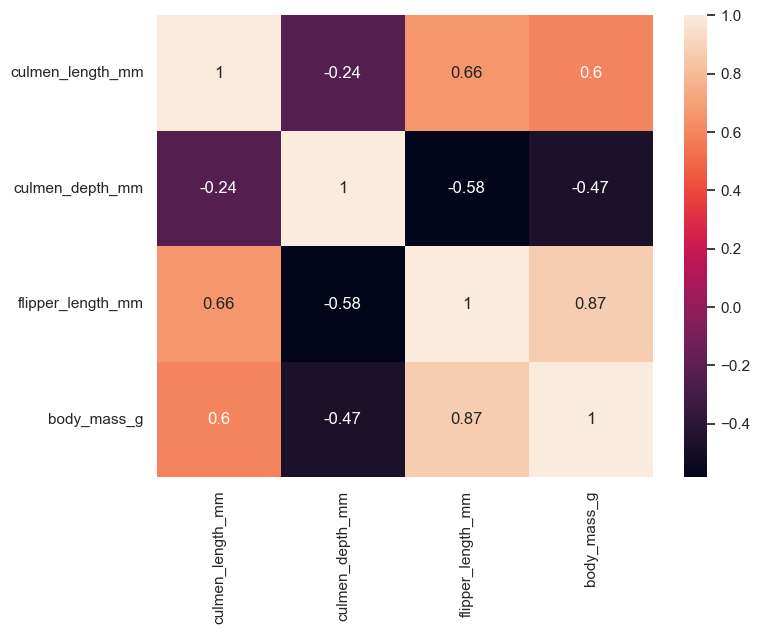

In [74]:
sns.heatmap(data.corr(), annot = True)

<a id="Conclusion"></a>
# <p style="background-color:coral;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Conclusion</b></p>